Customer support case

In [11]:
# STEP 1: Install dependencies (if needed)
!pip install pandas scikit-learn

# STEP 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [12]:
# STEP 3: Dataset (Assuming the file is uploaded as 'support_cases.csv' in Google Colab)
# If you upload the file via Google Colab, it's stored under '/content/'
# Set the path to your dataset
file_path = '/content/support_cases.csv'  # Modify this path if the filename is different

# STEP 4: Load the dataset directly using pandas
df = pd.read_csv(file_path)

# STEP 5: Display the first few rows of the dataset
print(df.head())


   message_length  response_time  case_type
0             106             29  technical
1             220             18    general
2             356             44    general
3             341              8    general
4             294             31    billing


<ipython-input-16-f3dba8ff5726>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='case_type', palette='Set2')


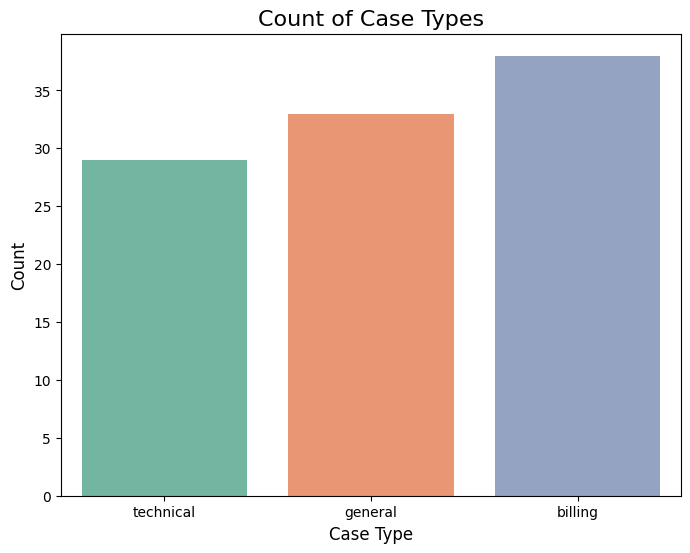

In [16]:
# STEP 4: Visualize the count of each case type (Bar chart)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='case_type', palette='Set2')
plt.title('Count of Case Types', fontsize=16)
plt.xlabel('Case Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


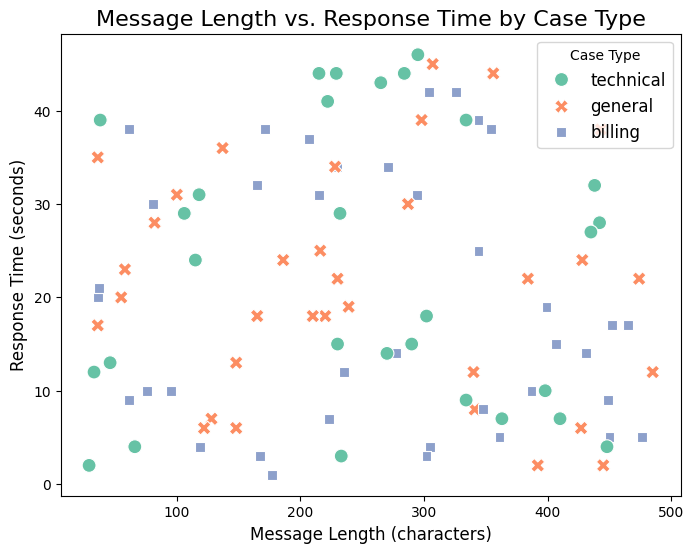

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='message_length', y='response_time', hue='case_type', palette='Set2', style='case_type', s=100)
plt.title('Message Length vs. Response Time by Case Type', fontsize=16)
plt.xlabel('Message Length (characters)', fontsize=12)
plt.ylabel('Response Time (seconds)', fontsize=12)
plt.legend(title='Case Type', fontsize=12)
plt.show()

In [18]:
# STEP 6: Encode the labels (case_type)
label_encoder = LabelEncoder()
df['case_type_encoded'] = label_encoder.fit_transform(df['case_type'])

# STEP 7: Prepare features (X) and labels (y)
X = df[['message_length', 'response_time']]  # Features
y = df['case_type_encoded']  # Target label

# STEP 8: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 9: Train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 10: Evaluate the model's performance
y_pred = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# STEP 11: Define a function that takes user input for prediction
def predict_case_type(message_length, response_time):
    input_data = pd.DataFrame([[message_length, response_time]], columns=['message_length', 'response_time'])
    pred_encoded = model.predict(input_data)[0]
    return label_encoder.inverse_transform([pred_encoded])[0]

# STEP 12: Take input from user and predict case type
print("\n🔍 Please enter the following details:")

# Taking message length and response time as input from the user
message_length = int(input("Enter message length (number of characters): "))
response_time = int(input("Enter response time (in seconds): "))

# Predicting the case type
predicted_case_type = predict_case_type(message_length, response_time)
print(f"Predicted case type: {predicted_case_type}")


📊 Classification Report:

              precision    recall  f1-score   support

     billing       0.78      0.64      0.70        11
     general       0.20      0.20      0.20         5
   technical       0.50      0.75      0.60         4

    accuracy                           0.55        20
   macro avg       0.49      0.53      0.50        20
weighted avg       0.58      0.55      0.55        20


🔍 Please enter the following details:
Enter message length (number of characters): 10
Enter response time (in seconds): 5
Predicted case type: technical
